# **Exploratory Data Analysis 2 : analyse des grandes tendances**

# 1. Introduction

La question des déterminants de la rencontre amoureuse et de la séduction en général ne cessent de fasciner. Ils sont le sujet éternel de la littérature, du cinéma et de la musique. Bien que l'approche y soit très différente, la question interroge aussi la science, et notamment les sciences sociales.

A l'heure du tout digital et des médias sociaux, la data et son florilège d'informations peut-elle nous révéler des liens cachés, des motivations insoupçonnées, voire des déterminismes puissants dans nos comportements amoureux et nos préférences sexuelles? La question intéresse et mérite d'être explorée!

Pour ce faire, nous avons un jeu de données issu de l'Université de Columbia qui a investigué sur les préférences amoureuses. Celui-ci contient des données sur des hommes et des femmes ayant participé à des évenements de speed dating expérimentaux entre 2002 et 2004. Lors de ces évènements, les participants ont eu plusieurs rencards de 4 minutes chacun avec des participants du sexe opposé. Après ce premier rencard, ils devaient décider si ils voulaient se rendre a un second rencard, et devaient noter leur rencard sur six points: Attractivité, Sincérité, Intelligence, Fun, Ambition et Passions Communes.

Le jeu de données contient aussi des données de questionnaires, avec des question posées avant, pendant et après les rencards des participants. Ces questionnaires se penchent sur les envies, les qualités perçues chez soi ou chez les autres, dans la recherche du partenaire romantique idéal. 

Nous décidons de nous pencher sur le cas particulier de l'amour vu du côté de la femme. 

**Qu'est-ce qui motive le comportement amoureux des femmes?**

**La nouvelle algocratie peut-elle révéler le secret du désir féminin?**

# 2. Imports

In [1]:
import src.settings.base as stg
from src.infrastructure.dataframecreation import DataFrameBuilder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 3. DataFrame

In [107]:
df = DataFrameBuilder(stg.SD_data)
df = df.data
df.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

In [108]:
df.shape

(8378, 195)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


# 4. Grandes tendances démographiques 

## 4.1 Répartition quantitative par sexe
Vu que nous choisissons de nous concentrer sur un seul des deux sexes pour notre étude, vérifions que notre dataset ne présente pas de problèmes d'équilibrage.

In [110]:
df.groupby(['gender'])['iid'].count().reset_index()

gender   iid
0       0  4184
1       1  4194

Le dataset est quasiment parfaitement équilibré.

## 4.2 Structure par âge

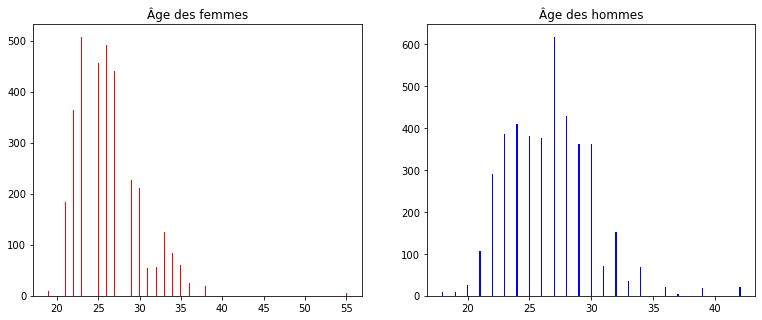

In [111]:
plt.figure(figsize = (20,5))

plt.subplot(131)
plt.bar(df[df['gender']==0].groupby(['age'])['iid'].count().reset_index()['age'], 
        df[df['gender']==0].groupby(['age'])['iid'].count().reset_index()['iid'], color="red",
        width= 0.1, align='center')
plt.title("Âge des femmes")

plt.subplot(132)
plt.bar(df[df['gender']==1].groupby(['age'])['iid'].count().reset_index()['age'],
        df[df['gender']==1].groupby(['age'])['iid'].count().reset_index()['iid'], color="blue",
               width= 0.1, align='center')
plt.title("Âge des hommes")

plt.show()

Les âges sont partagés pour l'essentiel entre 20 et 40 ans, avec un panel féminin ayant une moyenne plus jeune.

## 4.3 Structure par origine "raciale"

In [112]:
plt.figure(figsize = (20,5))
plt.subplot(131)

plt.bar(df[df['gender']==0].groupby(['race'])['iid'].count().reset_index()['race'], 
        df[df['gender']==0].groupby(['race'])['iid'].count().reset_index()['iid'], color="red",
        width= 0.1, align='center')
plt.title("Origine 'raciale' des femmes")
plt.subplot(132)

plt.bar(df[df['gender']==1].groupby(['race'])['iid'].count().reset_index()['race'],
        df[df['gender']==1].groupby(['race'])['iid'].count().reset_index()['iid'], color="blue",
               width= 0.1, align='center')
plt.title("Origine 'raciale' des hommes")
plt.show()

**1**: Black / African American

**2**: European / Caucasian-American

**3**: Latino / Hispanic American

**4**: Asian / Pacific Islander / Asian-American

**5**: Native American

**6**: Other

On voit une composition similaire pour les hommes et les femmes, avec une réparition entre blancs et diversité reflétant la société américaine de l'époque.

## 4.4 Structure par décision prise au terme du premier rencard

In [113]:
plt.figure(figsize = (20,5))
plt.subplot(131)

plt.bar(df[df['gender']==0].groupby(['dec'])['iid'].count().reset_index()['dec'], 
        df[df['gender']==0].groupby(['dec'])['iid'].count().reset_index()['iid'], color="red",
        width= 0.1, align='center')
plt.title("Décision des femmes sur un second rencard")
plt.subplot(132)

plt.bar(df[df['gender']==1].groupby(['dec'])['iid'].count().reset_index()['dec'],
        df[df['gender']==1].groupby(['dec'])['iid'].count().reset_index()['iid'], color="blue",
               width= 0.1, align='center')
plt.title("Décision des hommes sur un second rencard")
plt.show()

# Décision défavorable ==> 0
# Décision favorable ==> 1

Les femmes sont plus exigeantes avec les décisions qu'elles prennent. Là où les hommes prennent près de 50% de décisions positives, les femmes prennent une décision positive dans seulement un tiers des cas. Raison de plus de se pencher sur les motivations de ces décisions plus strictes!

# 5. Aperçus issus des questionnaires

## *préalable* Restriction du jeu de données au public féminin

In [114]:
dff = df[df["gender"] != 0]

In [115]:
dff.shape

(4194, 195)

Nous avons donc un panel de 4194 décisions romantiques prises par des femmes au cours de l'expérience.

## 5.1 Examen des intentions avant la participation à l'expérience

In [116]:
# What is your primary goal in participating in this event?
dict1 = {'goal': {1: "Seemed like a fun night out", 
                  2: "To meet new people", 
                  3: "To get a date" , 
                  4: "Looking for a serious relationship" ,
                  5: "To say I did it" ,
                  6: "Other" }}
goal = dff.replace(dict1)
primary = goal.groupby(['goal'])['iid'].count().reset_index()
primary

goal   iid
0  Looking for a serious relationship   172
1                               Other   230
2         Seemed like a fun night out  1739
3                       To get a date   434
4                  To meet new people  1365
5                     To say I did it   234

Seul 14,5% des participantes se sont rendues au speed dating avec l'intention unique de rencontrer un homme. 

## 5.2 Examen des habitudes de rencontres romantiques

In [117]:
# In general, how frequently do you go on dates? 
dict2 = {'date': {1: "Several times a week", 
                  2: "Twice a week", 
                  3: "Once a week" , 
                  4: "Twice a month" ,
                  5: "Once a month" ,
                  6: "Several times a year",
                  7: "Almost never"}}

date = dff.replace(dict2)
frequence = date.groupby(['date'])['iid'].count().reset_index()
frequence

date   iid
0          Almost never   579
1          Once a month   882
2           Once a week   467
3  Several times a week    48
4  Several times a year   963
5         Twice a month  1040
6          Twice a week   177

Seul 16,5% des participantes ont au moins un rencard par semaine.

## 5.3 Examen des habitudes de socialisation

In [118]:
# How often do you go out (not necessarily on dates)?
dict3 = {'go_out': {1: "Several times a week", 
                    2: "Twice a week", 
                    3: "Once a week" , 
                    4: "Twice a month" ,
                    5: "Once a month" ,
                    6: "Several times a year",
                    7: "Almost never"}}

social = dff.replace(dict3)
frequence2 = social.groupby(['go_out'])['iid'].count().reset_index()
frequence2

go_out   iid
0          Almost never    19
1          Once a month   124
2           Once a week   888
3  Several times a week  1268
4  Several times a year    78
5         Twice a month   169
6          Twice a week  1628

90% des participantes sortent au moins une fois par semaine. 

## 5.4 Examen des profils socio-professionnels

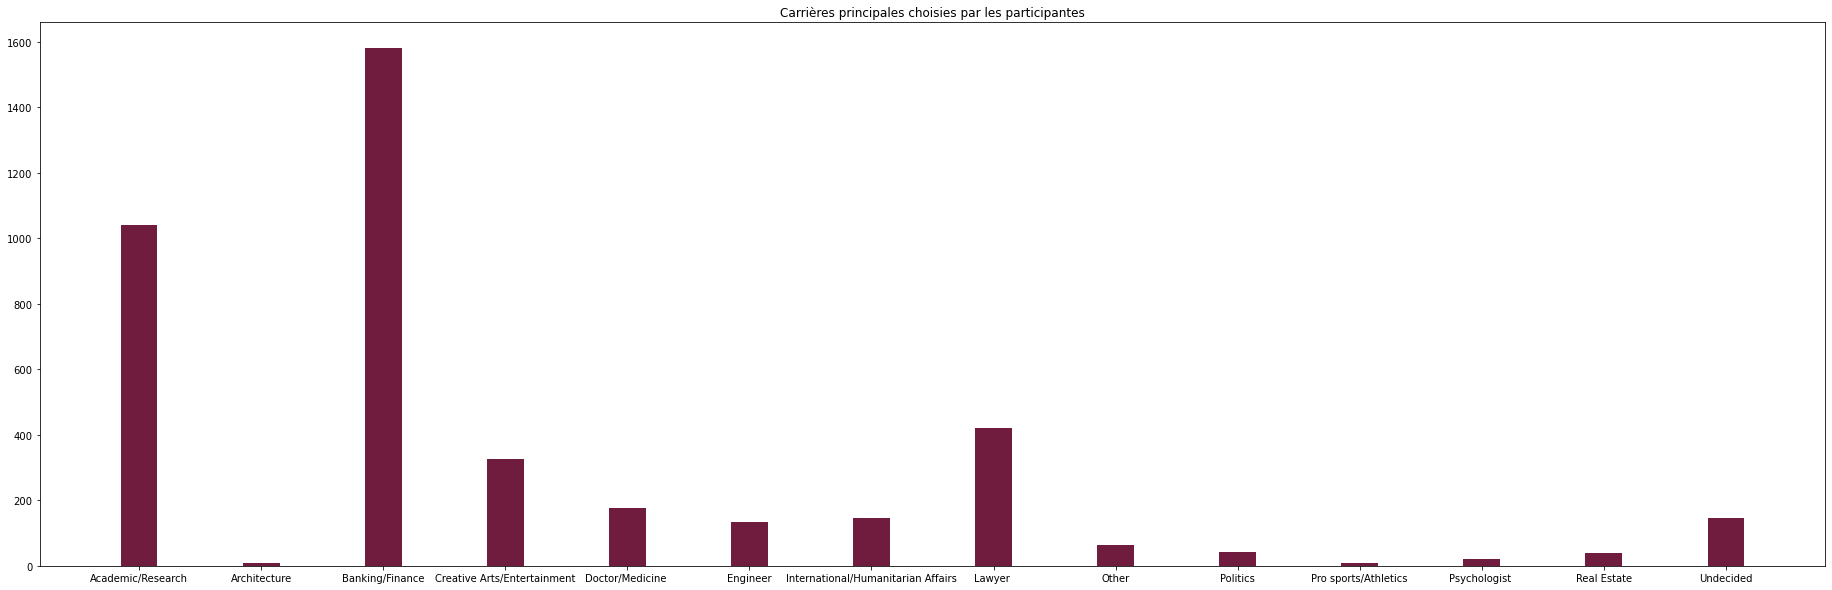

In [119]:
# What is your intended career?
dict4 = {'career_c': {1: "Lawyer ", 
                    2: "Academic/Research", 
                    3: "Psychologist " , 
                    4: "Doctor/Medicine " ,
                    5: "Engineer" ,
                    6: "Creative Arts/Entertainment",
                    7: "Banking/Finance",
                    8: "Real Estate", 
                    9: "International/Humanitarian Affairs", 
                    10: "Undecided" , 
                    11: "Social Work" ,
                    12: "Speech Pathology" ,
                    13: "Politics",
                    14: "Pro sports/Athletics",
                    15: "Other" ,
                    16: "Journalism" ,
                    17: "Architecture"}}

work = dff.replace(dict4)
career = work.groupby(['career_c'])['iid'].count().reset_index()

plt.figure(figsize = (32,10))

plt.bar(work.groupby(['career_c'])['iid'].count().reset_index()['career_c'], 
        work.groupby(['career_c'])['iid'].count().reset_index()['iid'], color='#701C3F',
        width= 0.3, align='center')
plt.title("Carrières principales choisies par les participantes")
plt.show()

On voit une très grande représentation des professions intellectuelles supérieures du monde de la finance et de la recherche. 

# 6. EDA sur les features retenues

In [84]:
import src.settings.base as stg
from src.infrastructure.dataframecreation import DataFrameBuilder
from src.domain.featureselection import FeatureSelector

In [85]:
df = FeatureSelector().women_decisions
X = FeatureSelector().women_decisions_features
Y = FeatureSelector().women_decisions_target

In [86]:
df.head()

attr_o  sinc_o  intel_o  fun_o  amb_o  shar_o  dec_o
0     6.0     9.0      7.0    7.0    6.0     5.0      1
1     5.0     7.0      8.0    4.0    6.0     3.0      0
2     7.0     9.0     10.0    7.0    8.0     9.0      0
3     4.0    10.0      8.0    5.0    8.0     7.0      0
4     5.0     8.0      8.0    2.0    2.0     2.0      0

In [87]:
df.describe()

attr_o       sinc_o      intel_o        fun_o        amb_o  \
count  3457.000000  3457.000000  3457.000000  3457.000000  3457.000000   
mean      5.934770     7.092132     7.449812     6.284495     6.940845   
std       2.011004     1.864625     1.614419     2.062847     1.852266   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     6.000000     7.000000     5.000000     6.000000   
50%       6.000000     7.000000     8.000000     6.000000     7.000000   
75%       7.000000     8.000000     9.000000     8.000000     8.000000   
max      10.000000    10.000000    10.000000    10.000000    10.000000   

            shar_o        dec_o  
count  3457.000000  3457.000000  
mean      5.396442     0.372577  
std       2.203705     0.483561  
min       0.000000     0.000000  
25%       4.000000     0.000000  
50%       6.000000     0.000000  
75%       7.000000     1.000000  
max      10.000000     1.000000

In [88]:
rcParams['figure.figsize'] = 20,10

## 6.1 Attractivité

In [89]:
ax = sns.countplot(x=df['attr_o'])
ax.set_title("Compte des niveaux d'attractivité")

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

On observe une loi normale autour de 6 - 6,5 de moyenne pour l'attractivité. Les hommes sont donc d'attractivité convenable selon leurs partenaires.

In [98]:
sns.countplot(x=df['attr_o'], hue=df['dec_o'])

<AxesSubplot:xlabel='attr_o', ylabel='count'>

## 6.2 Sincérité

In [90]:
ax = sns.countplot(x=df['sinc_o'])
ax.set_title("Compte des niveaux de sincérité")

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

On observe une loi normale autour de 7 - 7,5 de moyenne pour la sincérité. Les hommes ont donc une bonne sincérité selon leurs partenaires.

In [99]:
sns.countplot(x=df['sinc_o'], hue=df['dec_o'])

<AxesSubplot:xlabel='sinc_o', ylabel='count'>

## 6.3 Intelligence

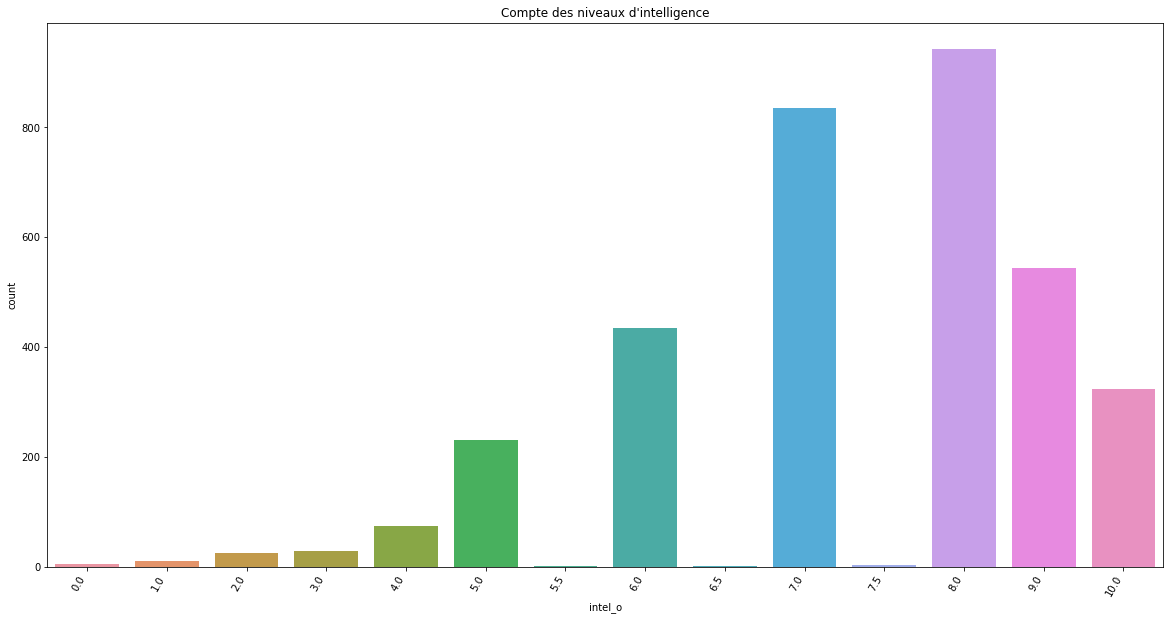

In [91]:
ax = sns.countplot(x=df['intel_o'])
ax.set_title("Compte des niveaux d'intelligence")

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

On observe une loi normale autour de 7 - 7,5 de moyenne pour l'intelligence. Les hommes sont ont donc une bonne intelligence selon leurs partenaires.

In [100]:
sns.countplot(x=df['intel_o'], hue=df['dec_o'])

<AxesSubplot:xlabel='intel_o', ylabel='count'>

## 6.4 Fun

In [92]:
ax = sns.countplot(x=df['fun_o'])
ax.set_title("Compte des niveaux de fun")

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

On observe une loi normale autour de 6 - 6,5 de moyenne pour le fun. Les hommes sont ont donc assez fun selon leurs partenaires.

<AxesSubplot:xlabel='fun_o', ylabel='count'>

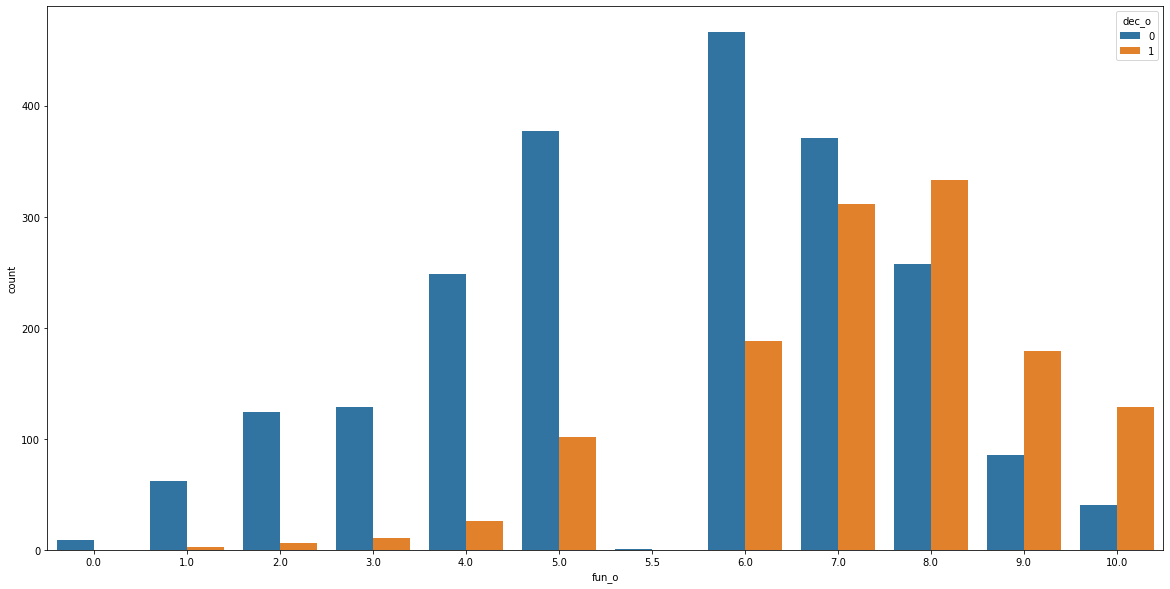

In [101]:
sns.countplot(x=df['fun_o'], hue=df['dec_o'])

## 6.5 Ambition

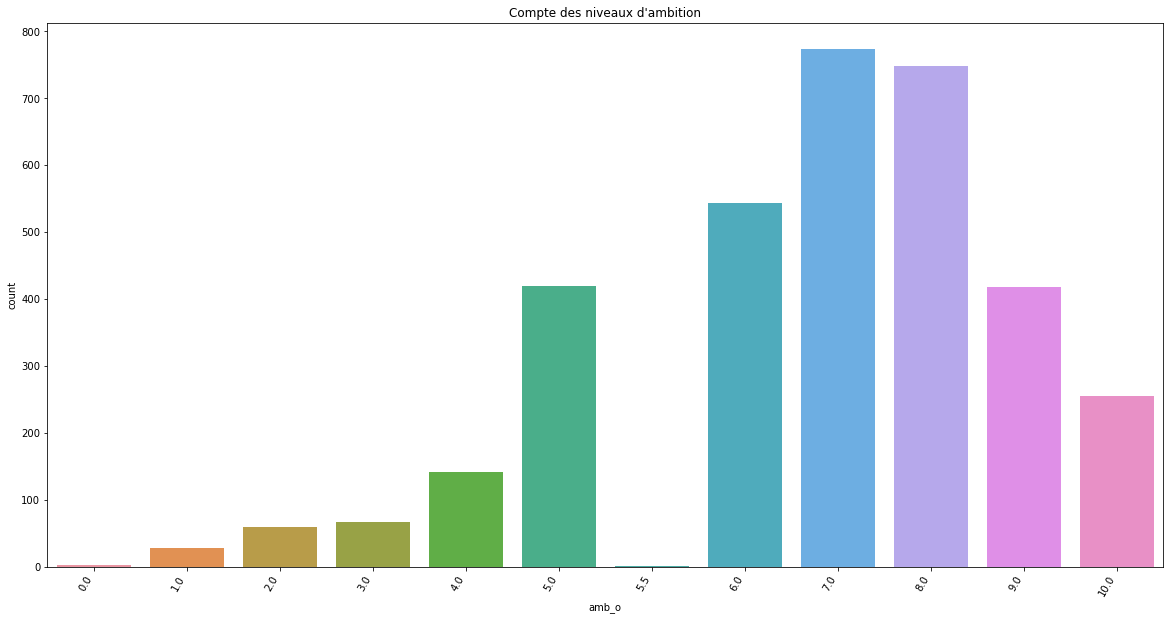

In [93]:
ax = sns.countplot(x=df['amb_o'])
ax.set_title("Compte des niveaux d'ambition")

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

On observe une loi normale autour de 7 de moyenne pour l'ambition. Les hommes présente donc un vrai caracrère ambitieux selon leurs partenaires.

<AxesSubplot:xlabel='amb_o', ylabel='count'>

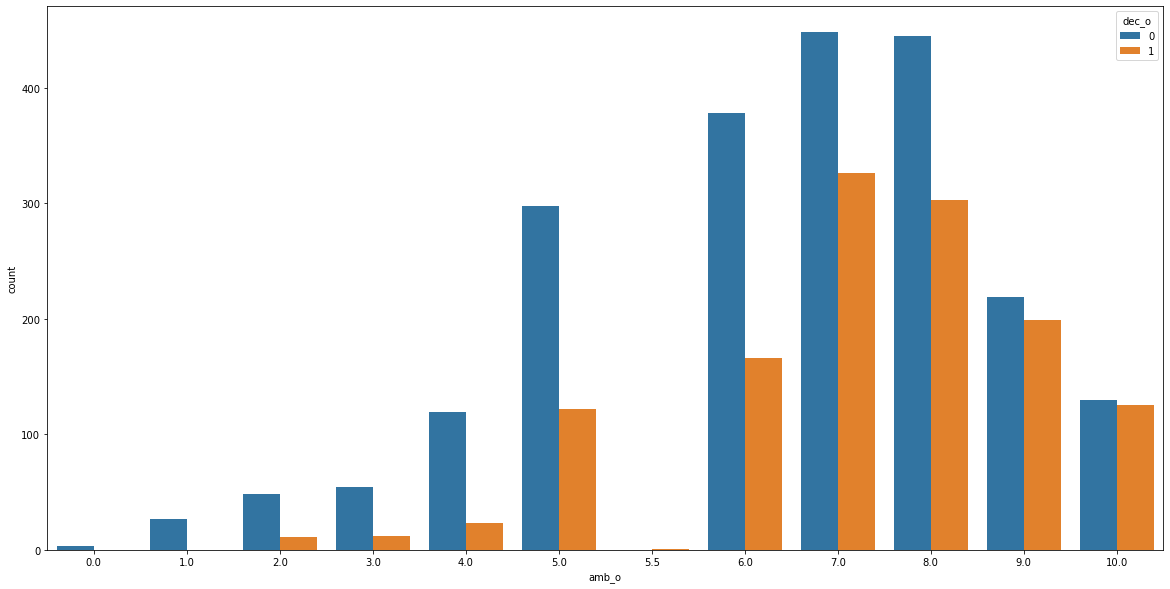

In [103]:
sns.countplot(x=df['amb_o'], hue=df['dec_o'])

## 6.6 Passions Communes

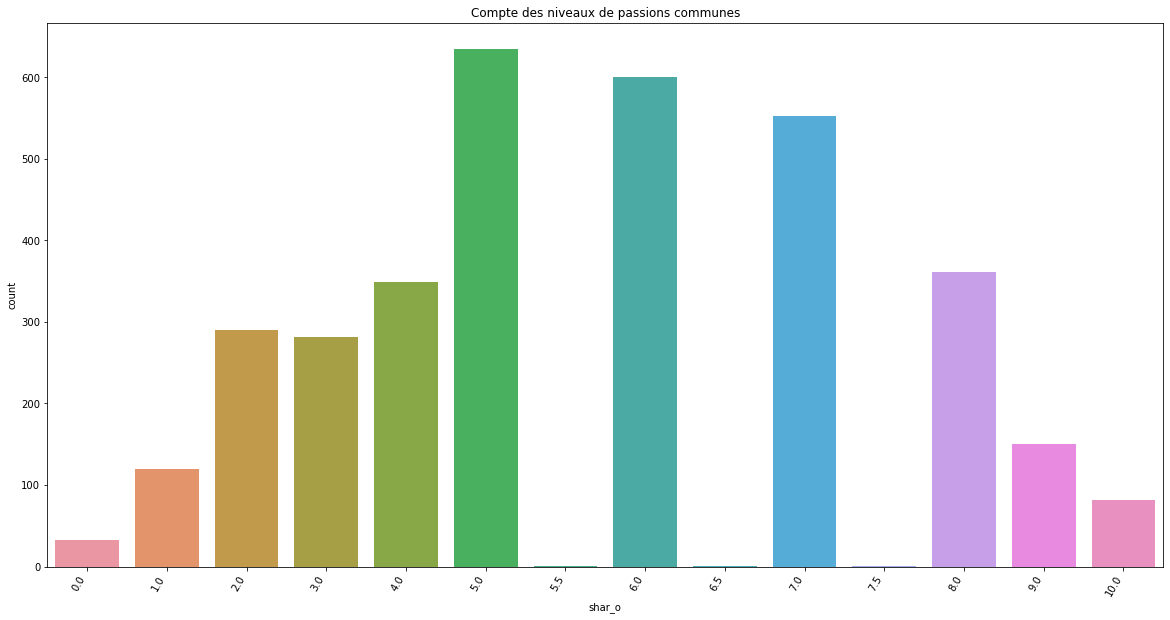

In [94]:
ax = sns.countplot(x=df['shar_o'])
ax.set_title("Compte des niveaux de passions communes")

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

On observe une loi normale autour de 5 - 5,5 de moyenne pour les passions communes. Les hommes ont donc des passions communes moyennement partagées avec leurs partenaires.

<AxesSubplot:xlabel='shar_o', ylabel='count'>

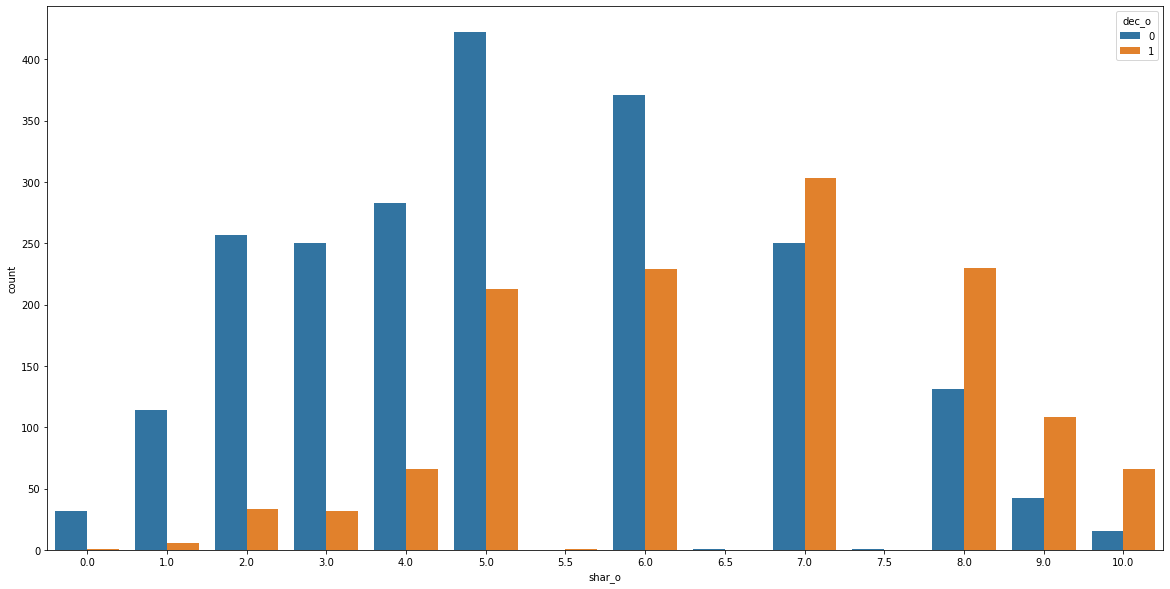

In [104]:
sns.countplot(x=df['shar_o'], hue=df['dec_o'])